In [ ]:
!pip install mlflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 kB 947.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 57.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.2/131.2 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 808.4/808.4 kB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 3.0 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing

In [ ]:
# Data analysis library
import numpy as np
import pandas as pd

# Machine Learning library
import sklearn
from sklearn.metrics import roc_curve, auc, accuracy_score, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
from lightgbm import plot_importance, plot_metric

# Model experimentation library
import mlflow
import mlflow.sklearn
from mlflow.tracking import MlflowClient

# Plotting library
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import mlflow
print(mlflow.__version__)

3.9.0


In [ ]:
with mlflow.start_run(run_name="MLflow-demo"):
  mlflow.log_metric("m1", 2.0)
  mlflow.log_param("p1", "mlflow-demo")

2026/02/20 05:52:43 INFO alembic.runtime.plugins: setup plugin alembic.autogenerate.schemas
2026/02/20 05:52:43 INFO alembic.runtime.plugins: setup plugin alembic.autogenerate.tables
2026/02/20 05:52:43 INFO alembic.runtime.plugins: setup plugin alembic.autogenerate.types
2026/02/20 05:52:43 INFO alembic.runtime.plugins: setup plugin alembic.autogenerate.constraints
2026/02/20 05:52:43 INFO alembic.runtime.plugins: setup plugin alembic.autogenerate.defaults
2026/02/20 05:52:43 INFO alembic.runtime.plugins: setup plugin alembic.autogenerate.comments
2026/02/20 05:52:43 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2026/02/20 05:52:43 INFO mlflow.store.db.utils: Updating database tables
2026/02/20 05:52:43 INFO alembic.runtime.migration: Context impl SQLiteImpl.
2026/02/20 05:52:43 INFO alembic.runtime.migration: Will assume non-transactional DDL.
2026/02/20 05:52:43 INFO alembic.runtime.migration: Running upgrade  -> 451aebb31d03, add metric step
2026/02/20 05:5

In [ ]:
# run tracking UI in the background
get_ipython().system_raw("mlflow ui --port 5000 &")

In [ ]:
# this step is for google-colab only
!pip install pyngrok --quiet
from pyngrok import ngrok
from getpass import getpass


In [ ]:
# Terminate open tunnels if any exist
ngrok.kill()

In [ ]:
# Enter your auth token when the code is running
NGROK_AUTH_TOKEN = getpass('Enter the ngrok authtoken: ')
ngrok.set_auth_token(NGROK_AUTH_TOKEN)
ngrok_tunnel = ngrok.connect(addr="5000", proto="http", bind_tls=True)
print("MLflow Tracking UI:", ngrok_tunnel.public_url)


Enter the ngrok authtoken: ··········
MLflow Tracking UI: https://76dd-34-125-135-168.ngrok-free.app


In [ ]:
experiment_name = "MLOPs_Demo_experiments_v1"
artifact_repository = './mlflow-demo'

# Provide uri and connect to your tracking server
mlflow.set_tracking_uri('http://127.0.0.1:5000/')

# Initialize MLflow client
client = MlflowClient()

# If experiment doesn't exist then it will create new
# else it will take the experiment id and will use to to run the experiments
try:
    # Create experiment
    experiment_id = client.create_experiment(experiment_name, artifact_location=artifact_repository)
except:
    # Get the experiment id if it already exists
    experiment_id = client.get_experiment_by_name(experiment_name).experiment_id

In [ ]:
experiment_id

'609489963401543601'

In [ ]:
## Files
data_file = '/content/Placement_data_full_class.csv'

# Load train loan dataset
try:
    data = pd.read_csv(data_file)
    print("The dataset has {} samples with {} features.".format(*data.shape))
except:
    print("The dataset could not be loaded. Is the dataset missing?")

The dataset has 215 samples with 15 features.


In [ ]:
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [ ]:
exclude_feature = ['sl_no', 'salary', 'status']
# Define Target columns
target = data['status'].map({"Placed": 0 , "Not Placed": 1})

# Define numeric and categorical features
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
numeric_features = [col for col in numeric_columns if col not in exclude_feature]
categorical_features = [col for col in categorical_columns if col not in exclude_feature]

# Define final feature list for training and validation
features = numeric_features + categorical_features
# Final data for training and validation
data = data[features]
data = data.fillna(0)

# Split data in train and vlaidation
X_train, X_valid, y_train, y_valid = train_test_split(data, target, test_size=0.15, random_state=10)

# Perform label encoding for categorical variable
for feature in categorical_features:
    le = LabelEncoder()
    le.fit(X_train.loc[:, feature])
    X_train.loc[:, feature] = le.transform(X_train.loc[:, feature])
    X_valid.loc[:, feature] = le.transform(X_valid.loc[:, feature])

In [ ]:
def model_experimentation(classifier, param, model_name, run_name):
    # Launching Multiple Runs in One Program.This is easy to do because the ActiveRun object returned by mlflow.start_run() is a
    # Python context manager. You can “scope” each run to just one block of code as follows:
    with mlflow.start_run(experiment_id=experiment_id, run_name=run_name) as run:
        # Get run id
        run_id = run.info.run_id

        # Provide brief notes about the run
        MlflowClient().set_tag(run_id,
                               "mlflow.note.content",
                               "This is experiment for exploring different machine learning models for Campus Recruitment Dataset")

        # To enable autologging for scikit-learn estimators.
        # 1) Log estimator parameters
        # 2) Log common metrics for classifier
        # 3) Log model Artifacts
        mlflow.sklearn.autolog()

        # Define custom tag
        tags = {"Application": "Payment Monitoring Platform",
                "release.candidate": "PMP",
                "release.version": "2.2.0"}

        # Set Tag
        mlflow.set_tags(tags)

        # Log python environment details
        # mlflow.log_artifact('/content/requirements.txt')

        # Perform model training
        clf = classifier(**param)
        clf.fit(X_train, y_train)

        # Perform model evaluation
        valid_prediction = clf.predict_proba(X_valid)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_valid, valid_prediction)
        roc_auc = auc(fpr, tpr) # compute area under the curve
        print("=====================================")
        print("Validation AUC:{}".format(roc_auc))
        print("=====================================")

        # log metrics
        mlflow.log_metrics({"Validation_AUC": roc_auc})

        # Plot and save metrics details
        ConfusionMatrixDisplay.from_estimator(clf, X_valid, y_valid,
                              display_labels=['Placed', 'Not Placed'],
                              cmap='magma')
        plt.title('Confusion Matrix')
        filename = f'/content/{model_name}_validation_confusion_matrix.png'
        plt.savefig(filename)
        # log model artifacts
        mlflow.log_artifact(filename)

        # Plot and save AUC details
        RocCurveDisplay.from_estimator(clf, X_valid, y_valid, name='Validation')
        plt.title('ROC AUC Curve')
        filename = f'/content/{model_name}_validation_roc_curve.png'
        plt.savefig(filename)
        # log model artifacts
        mlflow.log_artifact(filename)

Validation AUC:0.8909774436090225
🏃 View run LogisticRegression_model at: http://127.0.0.1:5000/#/experiments/1/runs/80b7df1e67014f15b8d26e6a1ab1cdd5
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1


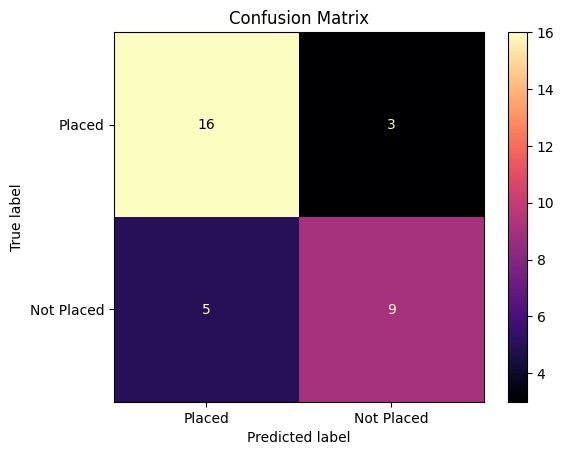

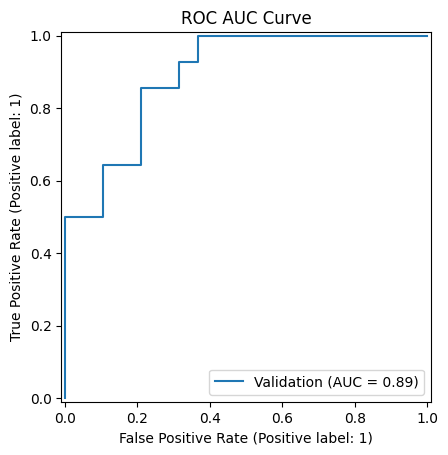

In [ ]:
classifier = LogisticRegression
param = {"C":1, "random_state":20}
model_name = 'Lt'
run_name = 'LogisticRegression_model'
model_experimentation(classifier, param, model_name, run_name)

##Decision Tree Training and evaluation + MLFlow for model tracking

Validation AUC:0.8571428571428572
🏃 View run DecisionTree_model at: http://127.0.0.1:5000/#/experiments/1/runs/ddd75ed6d086425aaddac5c061af5e3b
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1


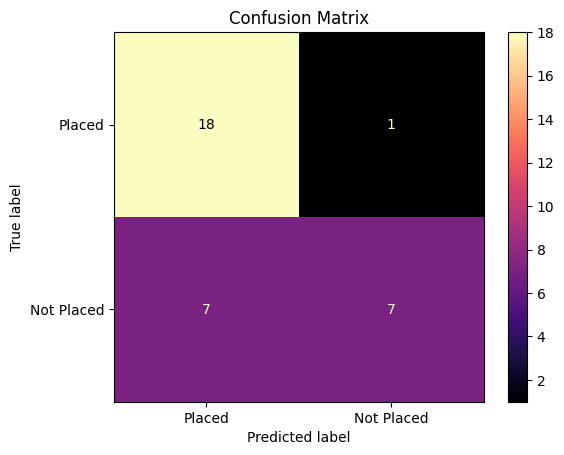

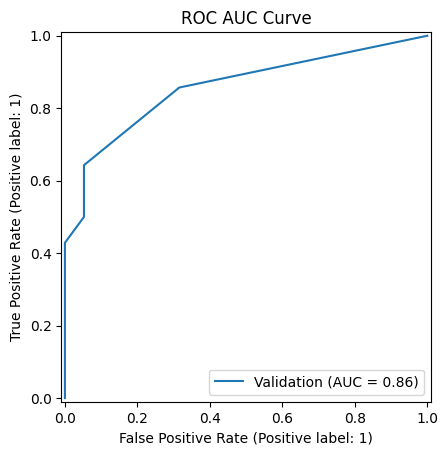

In [ ]:
classifier = DecisionTreeClassifier
param = {"max_depth":3, "random_state":20}
model_name = 'dt'
run_name = 'DecisionTree_model'
model_experimentation(classifier, param, model_name, run_name)

##Random Forest Training and evaluation + MLFlow for model tracking

Validation AUC:0.887218045112782
🏃 View run randomForest_model at: http://127.0.0.1:5000/#/experiments/1/runs/6ed6c25137ce4523aca4e20f5e4925ba
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1


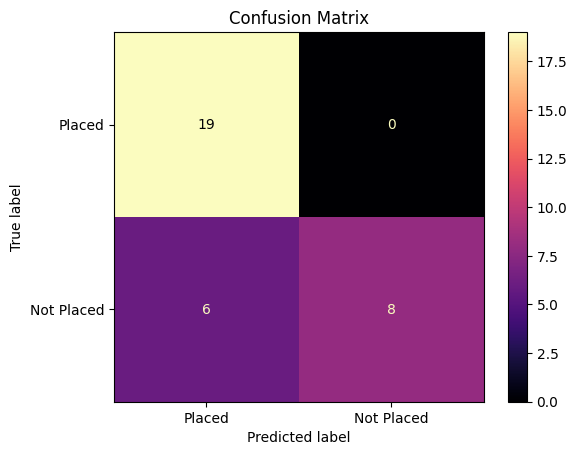

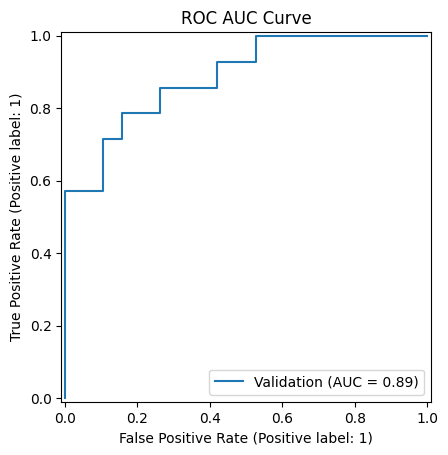

In [ ]:
classifier = RandomForestClassifier
param = {"max_depth":3, "random_state":20}
model_name = 'rf'
run_name = 'randomForest_model'
model_experimentation(classifier, param, model_name, run_name)

##Gradient Boosting Training and evaluation + MLFlow for model tracking

Validation AUC:0.8909774436090225
🏃 View run GradientBoosting_model at: http://127.0.0.1:5000/#/experiments/609489963401543601/runs/4c29df080ca44da68e02cfea2584dccf
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/609489963401543601


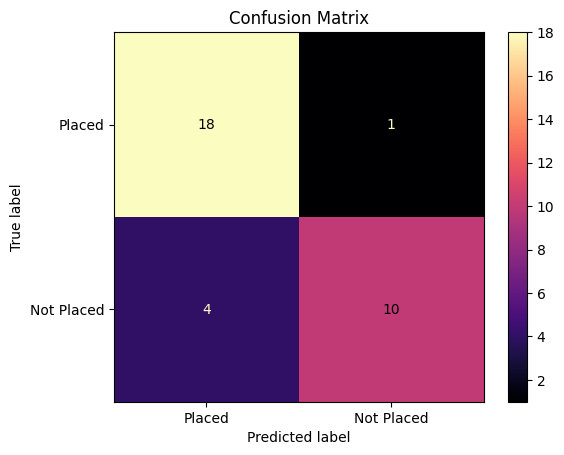

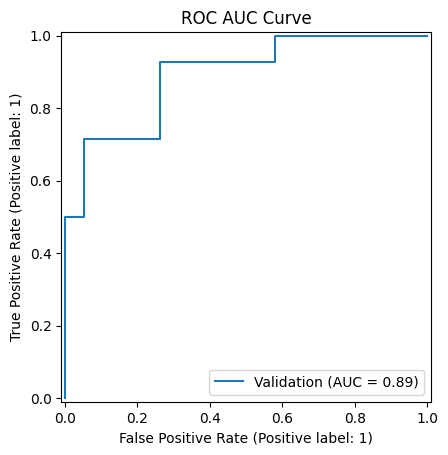

In [ ]:
classifier = GradientBoostingClassifier
param = {"max_depth":3, "random_state":20}
model_name = 'gbm'
run_name = 'GradientBoosting_model'
model_experimentation(classifier, param, model_name, run_name)